In [1]:
import requests
import pandas as pd

In [2]:
mia_trad = requests.get("https://api.mashvisor.com/v1.1/client/neighborhood/268938/historical/traditional?state=FL", headers={'x-api-key':'7b9581e3-5b45-4fbc-8f59-d3379db49449'})
mia_trent = mia_trad.json()
mia_trent

{'status': 'success',
 'content': {'months': [{'year': 2021,
    'month': 4,
    'zero_room_value': 1180,
    'one_room_value': 1506.6,
    'two_room_value': 1860,
    'three_room_value': 2503.25,
    'four_room_value': 2604},
   {'year': 2021,
    'month': 3,
    'zero_room_value': 1180,
    'one_room_value': 1506.6,
    'two_room_value': 1860,
    'three_room_value': 2418,
    'four_room_value': 2604},
   {'year': 2021,
    'month': 2,
    'zero_room_value': 1180,
    'one_room_value': 1534.5,
    'two_room_value': 1860,
    'three_room_value': 2418,
    'four_room_value': 2604},
   {'year': 2021,
    'month': 1,
    'zero_room_value': 1180,
    'one_room_value': 1534.5,
    'two_room_value': 1953,
    'three_room_value': 2511,
    'four_room_value': 2604},
   {'year': 2020,
    'month': 12,
    'zero_room_value': 1060,
    'one_room_value': 1516.35,
    'two_room_value': 1929.9,
    'three_room_value': 2481.3,
    'four_room_value': 2573.2},
   {'year': 2020,
    'month': 11,
    'z

In [3]:
mia_trent["content"].keys()

dict_keys(['months', 'averages'])

In [4]:
rent_miafl = pd.DataFrame.from_dict(mia_trent['content']['months'])
rent_miafl

,year,month,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value
0,2021,4,1180.00,1506.60,1860.00,2503.25,2604.00
1,2021,3,1180.00,1506.60,1860.00,2418.00,2604.00
2,2021,2,1180.00,1534.50,1860.00,2418.00,2604.00
3,2021,1,1180.00,1534.50,1953.00,2511.00,2604.00
4,2020,12,1060.00,1516.35,1929.90,2481.30,2573.20
5,2020,11,2665.10,1525.54,1929.90,2412.38,2573.20
6,2020,10,3676.00,1525.54,1929.90,2389.40,2573.20
7,2020,9,3997.65,1527.84,1929.90,2389.40,2665.10
8,2020,8,4411.20,1525.54,1929.90,2343.45,2480.84
9,2020,7,1516.35,1530.14,1962.06,2251.55,2665.10


In [5]:
rent_miafl['dates'] =pd.to_datetime(rent_miafl['year'].astype(str) + "-" + rent_miafl['month'].astype(str))
rent_miafl_df = rent_miafl.drop(columns=["year", "month"])
miami_rent = rent_miafl_df.sort_values('dates', ascending=True)
miami_rent


,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value,dates
11,1447.43,1102.80,1631.22,2018.74,2297.50,2020-05-01
10,1516.35,1427.51,1746.10,2282.18,2757.00,2020-06-01
9,1516.35,1530.14,1962.06,2251.55,2665.10,2020-07-01
8,4411.20,1525.54,1929.90,2343.45,2480.84,2020-08-01
7,3997.65,1527.84,1929.90,2389.40,2665.10,2020-09-01
6,3676.00,1525.54,1929.90,2389.40,2573.20,2020-10-01
5,2665.10,1525.54,1929.90,2412.38,2573.20,2020-11-01
4,1060.00,1516.35,1929.90,2481.30,2573.20,2020-12-01
3,1180.00,1534.50,1953.00,2511.00,2604.00,2021-01-01
2,1180.00,1534.50,1860.00,2418.00,2604.00,2021-02-01


In [6]:
miami_rent_sort = miami_rent.sort_index()
miami_rent_sort

,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value,dates
0,1180.00,1506.60,1860.00,2503.25,2604.00,2021-04-01
1,1180.00,1506.60,1860.00,2418.00,2604.00,2021-03-01
2,1180.00,1534.50,1860.00,2418.00,2604.00,2021-02-01
3,1180.00,1534.50,1953.00,2511.00,2604.00,2021-01-01
4,1060.00,1516.35,1929.90,2481.30,2573.20,2020-12-01
5,2665.10,1525.54,1929.90,2412.38,2573.20,2020-11-01
6,3676.00,1525.54,1929.90,2389.40,2573.20,2020-10-01
7,3997.65,1527.84,1929.90,2389.40,2665.10,2020-09-01
8,4411.20,1525.54,1929.90,2343.45,2480.84,2020-08-01
9,1516.35,1530.14,1962.06,2251.55,2665.10,2020-07-01


<AxesSubplot:>

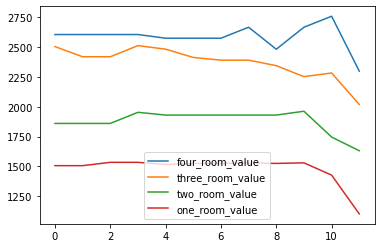

In [7]:
miami_rent_sort[['four_room_value','three_room_value','two_room_value', 'one_room_value']].plot()

In [8]:
orl_trad = requests.get("https://api.mashvisor.com/v1.1/client/neighborhood/268950/historical/traditional?state=FL", headers={'x-api-key':'7b9581e3-5b45-4fbc-8f59-d3379db49449'})
orl_trent = orl_trad.json()
orl_trent

{'status': 'success',
 'content': {'months': [{'year': 2021,
    'month': 4,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1116,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 3,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1162.5,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 2,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1209,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 1,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1209,
    'three_room_value': 1174.12,
    'four_room_value': 1474.05},
   {'year': 2020,
    'month': 12,
    'zero_room_value': 960,
    'one_room_value': 1132.8,
    'two_room_value': 1227.2,
    'three_room_value': 1180,
    'four_room_value': 1496.24},
   {'year': 2020,
    'month'

In [9]:
orl_trent["content"].keys()

dict_keys(['months', 'averages'])

In [10]:
rent_orlfl = pd.DataFrame.from_dict(orl_trent['content']['months'])
rent_orlfl

,year,month,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value
0,2021,4,1080,1116.00,1116.00,1185.75,1474.05
1,2021,3,1080,1116.00,1162.50,1185.75,1474.05
2,2021,2,1080,1116.00,1209.00,1185.75,1474.05
3,2021,1,1080,1116.00,1209.00,1174.12,1474.05
4,2020,12,960,1132.80,1227.20,1180.00,1496.24
5,2020,11,960,1132.80,1227.20,1180.00,1496.24
6,2020,10,960,1132.80,1227.20,1215.87,1496.24
7,2020,9,960,1132.80,1227.20,1274.40,1496.24
8,2020,8,960,1132.80,1274.40,1180.00,1203.60
9,2020,7,960,1132.80,1321.60,1180.00,1203.60


In [11]:
rent_orlfl['dates'] =pd.to_datetime(rent_orlfl['year'].astype(str) + "-" + rent_orlfl['month'].astype(str))
rent_orlfl_df = rent_orlfl.drop(columns=["year", "month"])
orlando_rent = rent_orlfl_df.sort_values('dates', ascending=True)
orlando_rent

,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value,dates
11,960,1098.53,1144.76,1697.63,1687.87,2020-05-01
10,960,1098.53,1215.87,1334.19,1687.87,2020-06-01
9,960,1132.80,1321.60,1180.00,1203.60,2020-07-01
8,960,1132.80,1274.40,1180.00,1203.60,2020-08-01
7,960,1132.80,1227.20,1274.40,1496.24,2020-09-01
6,960,1132.80,1227.20,1215.87,1496.24,2020-10-01
5,960,1132.80,1227.20,1180.00,1496.24,2020-11-01
4,960,1132.80,1227.20,1180.00,1496.24,2020-12-01
3,1080,1116.00,1209.00,1174.12,1474.05,2021-01-01
2,1080,1116.00,1209.00,1185.75,1474.05,2021-02-01


<AxesSubplot:>

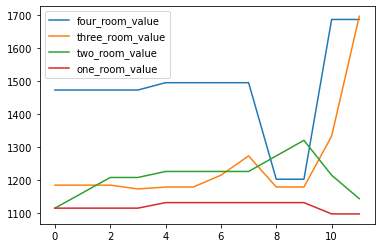

In [12]:
orlando_rent[['four_room_value','three_room_value','two_room_value', 'one_room_value']].plot(use_index=True)

In [13]:
tpa_trad = requests.get("https://api.mashvisor.com/v1.1/client/neighborhood/268950/historical/traditional?state=FL", headers={'x-api-key':'7b9581e3-5b45-4fbc-8f59-d3379db49449'})
tpa_trent = tpa_trad.json()
tpa_trent

{'status': 'success',
 'content': {'months': [{'year': 2021,
    'month': 4,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1116,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 3,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1162.5,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 2,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1209,
    'three_room_value': 1185.75,
    'four_room_value': 1474.05},
   {'year': 2021,
    'month': 1,
    'zero_room_value': 1080,
    'one_room_value': 1116,
    'two_room_value': 1209,
    'three_room_value': 1174.12,
    'four_room_value': 1474.05},
   {'year': 2020,
    'month': 12,
    'zero_room_value': 960,
    'one_room_value': 1132.8,
    'two_room_value': 1227.2,
    'three_room_value': 1180,
    'four_room_value': 1496.24},
   {'year': 2020,
    'month'

In [14]:
rent_tpafl = pd.DataFrame.from_dict(tpa_trent['content']['months'])
rent_tpafl

,year,month,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value
0,2021,4,1080,1116.00,1116.00,1185.75,1474.05
1,2021,3,1080,1116.00,1162.50,1185.75,1474.05
2,2021,2,1080,1116.00,1209.00,1185.75,1474.05
3,2021,1,1080,1116.00,1209.00,1174.12,1474.05
4,2020,12,960,1132.80,1227.20,1180.00,1496.24
5,2020,11,960,1132.80,1227.20,1180.00,1496.24
6,2020,10,960,1132.80,1227.20,1215.87,1496.24
7,2020,9,960,1132.80,1227.20,1274.40,1496.24
8,2020,8,960,1132.80,1274.40,1180.00,1203.60
9,2020,7,960,1132.80,1321.60,1180.00,1203.60


In [15]:
rent_tpafl['dates'] =pd.to_datetime(rent_tpafl['year'].astype(str) + "-" + rent_tpafl['month'].astype(str))
rent_tpafl_df = rent_tpafl.drop(columns=["year", "month"])
tampa_rent = rent_tpafl_df.sort_values('dates', ascending=True)
tampa_rent

,zero_room_value,one_room_value,two_room_value,three_room_value,four_room_value,dates
11,960,1098.53,1144.76,1697.63,1687.87,2020-05-01
10,960,1098.53,1215.87,1334.19,1687.87,2020-06-01
9,960,1132.80,1321.60,1180.00,1203.60,2020-07-01
8,960,1132.80,1274.40,1180.00,1203.60,2020-08-01
7,960,1132.80,1227.20,1274.40,1496.24,2020-09-01
6,960,1132.80,1227.20,1215.87,1496.24,2020-10-01
5,960,1132.80,1227.20,1180.00,1496.24,2020-11-01
4,960,1132.80,1227.20,1180.00,1496.24,2020-12-01
3,1080,1116.00,1209.00,1174.12,1474.05,2021-01-01
2,1080,1116.00,1209.00,1185.75,1474.05,2021-02-01


<AxesSubplot:>

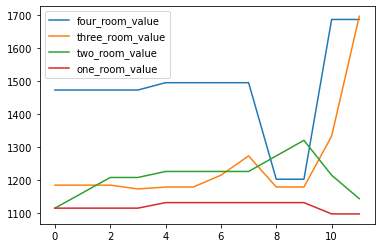

In [16]:
tampa_rent[['four_room_value','three_room_value','two_room_value', 'one_room_value']].plot(use_index=True)